In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
ad_data = pd.read_csv("data/advertising.csv")

In [3]:
ad_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
ad_data.shape

(200, 4)

In [5]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
ad_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


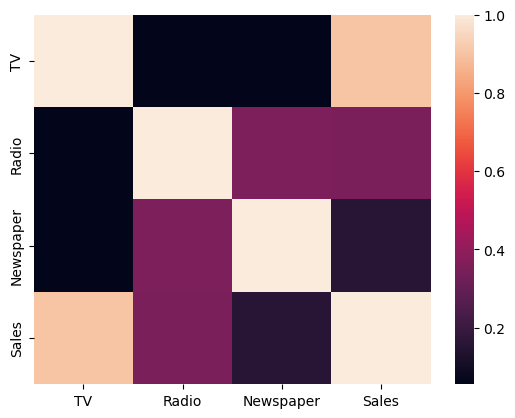

In [7]:
sns.heatmap(ad_data.corr())
plt.show()

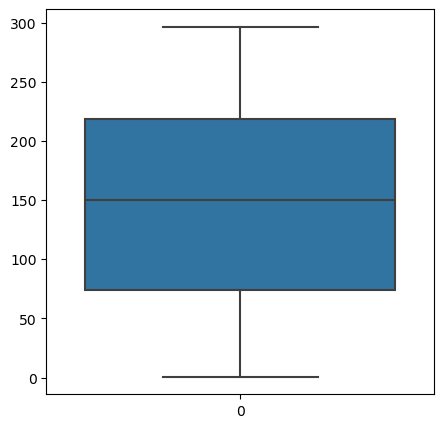

In [8]:
fig, axs = plt.subplots(1, figsize = (5,5))
plt1 = sns.boxplot(ad_data['TV'], ax = axs)

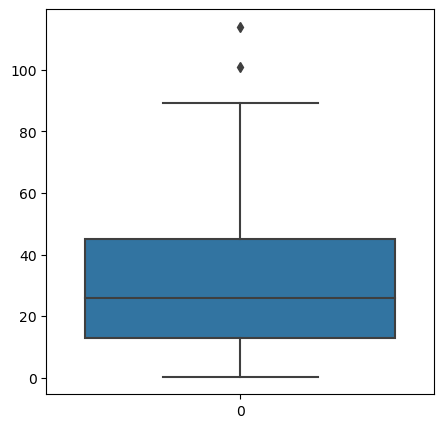

In [9]:
fig, axs = plt.subplots(1, figsize = (5,5))
plt2 = sns.boxplot(ad_data['Newspaper'], ax = axs)

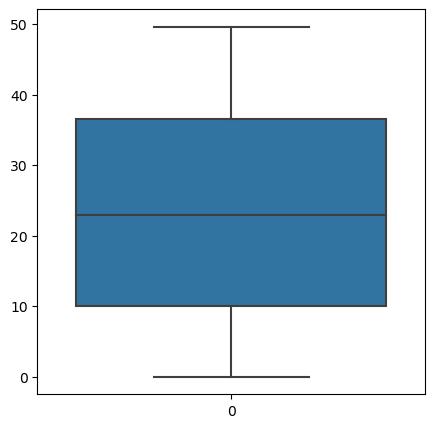

In [10]:
fig, axs = plt.subplots(1, figsize = (5,5))
plt3 = sns.boxplot(ad_data['Radio'], ax = axs)

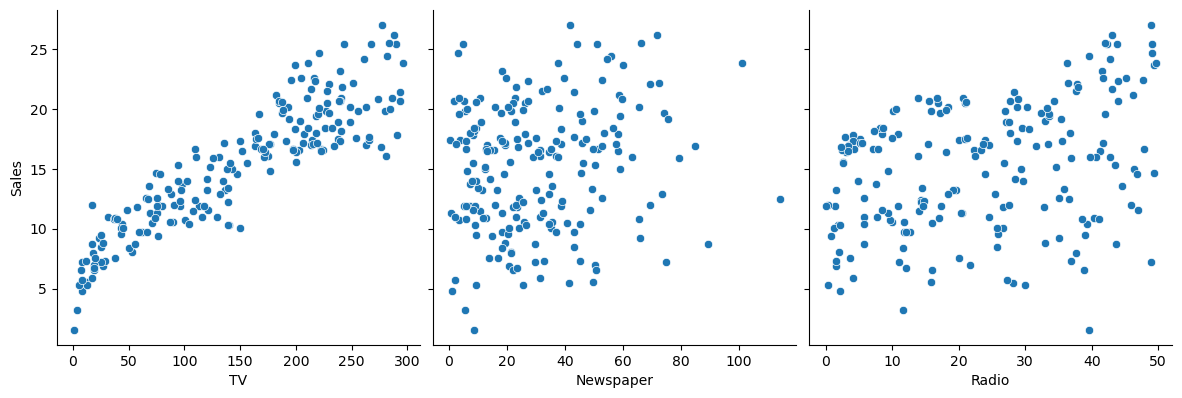

In [11]:
sns.pairplot(ad_data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4)
plt.show()

In [12]:
X = ad_data[["TV", "Newspaper", "Radio"]]
y = ad_data[["Sales"]]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25, random_state = 13)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE

In [15]:
mod = LinearRegression()
scores = cross_val_score(mod, X_train, y_train, scoring='r2', cv=5)

In [16]:
scores

array([0.90352639, 0.86440444, 0.90908683, 0.87212208, 0.92486229])

In [17]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': [1,2,3]}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3]}],
             return_train_score=True, scoring='r2', verbose=1)

In [18]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.columns
cols = ["param_n_features_to_select", "split0_test_score",'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score']

In [20]:
cv_results[cols].sort_values(by = 'rank_test_score')

,param_n_features_to_select,split0_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,2,0.924807,0.924807,0.913745,0.903970,0.903657,0.782082,0.885652,0.052362,1,0.899094,0.898371,0.902439,0.903142,0.919945,0.904598,0.007891
2,3,0.921754,0.921754,0.912649,0.903212,0.898855,0.782314,0.883757,0.051333,2,0.899556,0.898459,0.902469,0.903749,0.919958,0.904838,0.007797
0,1,0.143181,0.143181,0.092800,-0.032202,0.129488,-0.147488,0.037156,0.111145,3,0.072331,0.083715,0.097339,0.077710,0.107493,0.087717,0.012935


In [22]:
predictions = model_cv.predict(X_test)

In [26]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)

In [27]:
r2

0.8960117521320916